In [34]:
####################
## Tarea en clase ##
####################

# Crear funciones para calcular las medidas de tendencia central y de dispersión con Python puro (sin librerías)

import statistics

# Media
def my_mean(X):
    suma=0
    for x in X:
        suma += x
    return suma/len(X)
    
my_mean([1, 1, 2, 2, 2, 3, 4, 5, 6])


2.888888888888889

In [33]:
statistics.mean([1, 1, 2, 2, 2, 3, 4, 5, 6])

2.888888888888889

In [31]:
# Mediana
def my_median(X):
    if len(X) % 2 == 1:
        return sorted(X)[int((len(X)-1)/2)]
    else:
        return my_mean([sorted(X)[int(len(X)/2 - 1)], sorted(X)[int(len(X)/2)]])

my_median([1, 1, 2, 2, 2, 3, 4, 5, 6])


2

In [32]:
statistics.median([1, 1, 2, 2, 2, 3, 4, 5, 6])

2

In [29]:
# Moda
def my_mode(X):
    moda = X[0]
    contador_max = 1
    contador = 1
    for i in range(1, len(X)):
        if sorted(X)[i]==sorted(X)[i-1]:
            contador += 1
            if contador > contador_max:
                contador_max = contador
                moda = sorted(X)[i]
        else:
            contador = 1
    return moda
            
my_mode([1, 1, 2, 2, 2, 3, 4, 5, 6])

2

In [30]:
statistics.mode([1, 1, 2, 2, 2, 3, 4, 5, 6])

2

In [36]:
# Varianza
def my_variance(X):
    squared_dev_sum = 0
    for x in X:
        squared_dev_sum += (x - my_mean(X))**2
    return squared_dev_sum/(len(X)-1)

my_variance([1, 1, 2, 2, 2, 3, 4, 5, 6])

3.111111111111111

In [37]:
statistics.variance([1, 1, 2, 2, 2, 3, 4, 5, 6])

3.111111111111111

In [38]:
# Desviación Estándar
def my_sd(X):
    return (my_variance(X))**0.5

my_sd([1, 1, 2, 2, 2, 3, 4, 5, 6])

1.7638342073763937

In [39]:
statistics.stdev([1, 1, 2, 2, 2, 3, 4, 5, 6])

1.7638342073763937

In [27]:
# Comprueba si tus variables de interés son conjuntos de datos paramétricos o no paramétricos

# Realizamos la prueba de Shapiro para revisar normalidad en los datos.

# Se crea dataframe sólo con campos numéricos.
import pandas as pd
import numpy as np
df = pd.read_csv('datos.csv')
df_numeric = df.select_dtypes(include=np.number)
df_num = df_numeric.drop(columns=['index'])
df_num = df_num.apply(pd.to_numeric)


# Shapiro-Wilk Test
from scipy.stats import shapiro

# normality test
for columna in df_num:
	stat, p = shapiro(df_num[columna])
	print(columna)
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')
	print('')


# Se llega a la conclusión de que ninguna de las variables presenta normalidad, por lo que todas las variables son no paramétricas.

Modelo
Statistics=0.922, p=0.000
Sample does not look Gaussian (reject H0)

Cilindros
Statistics=0.755, p=0.000
Sample does not look Gaussian (reject H0)

Potencia (HP)
Statistics=0.920, p=0.000
Sample does not look Gaussian (reject H0)

Tamaño (L)
Statistics=0.893, p=0.000
Sample does not look Gaussian (reject H0)

R. Ciudad (km/l)
Statistics=0.982, p=0.000
Sample does not look Gaussian (reject H0)

R. Carr. (km/l)
Statistics=0.992, p=0.000
Sample does not look Gaussian (reject H0)

R. Comb. (km/l)
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)

R. Ajust. (km/l)
Statistics=0.986, p=0.000
Sample does not look Gaussian (reject H0)

CO2(g/km)
Statistics=0.936, p=0.000
Sample does not look Gaussian (reject H0)

NOx (g/1000km)
Statistics=0.394, p=0.000
Sample does not look Gaussian (reject H0)

Calificación Gas Ef. Inv.
Statistics=0.937, p=0.000
Sample does not look Gaussian (reject H0)



In [18]:
#############
## Tarea 3 ##
#############

# Calcula estadísticos descriptivos básicos para tus datos.

df.describe()

,index,Modelo,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.00000,4617.000000,4617.000000
mean,2308.000000,2014.187351,5.329218,254.991553,2.869923,10.604934,16.612749,13.183803,9.887754,256.53368,30.803552,4.885207
std,1332.957426,2.162132,1.800226,132.791017,1.347559,3.285876,4.186279,3.603346,2.702537,75.57912,56.901643,2.484840
min,0.000000,2011.000000,3.000000,60.000000,0.898000,3.100000,6.700000,4.960000,3.720000,107.00000,0.000000,0.000000
25%,1154.000000,2012.000000,4.000000,150.000000,1.800000,8.200000,13.480000,10.460000,7.850000,200.00000,10.000000,3.000000
50%,2308.000000,2014.000000,4.000000,220.000000,2.500000,10.420000,16.390000,12.870000,9.650000,243.00000,17.000000,5.000000
75%,3462.000000,2016.000000,6.000000,330.000000,3.600000,12.810000,19.600000,15.610000,11.710000,299.00000,28.000000,7.000000
max,4616.000000,2018.000000,12.000000,888.000000,8.400000,27.460000,31.300000,28.930000,21.700000,627.00000,724.000000,10.000000


In [26]:
# Haz una matriz de correlación de tus datos y escribe algunas interpretaciones de la misma.

import numpy as np

df_numeric.corr()

,index,Modelo,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.
index,1.000000,-0.075911,0.232569,0.157531,0.291899,-0.354533,-0.445946,-0.389319,-0.389324,0.417356,0.150189,-0.441216
Modelo,-0.075911,1.000000,-0.086090,0.031713,-0.107840,0.276963,0.275443,0.277631,0.277600,-0.271247,-0.035411,0.268483
Cilindros,0.232569,-0.086090,1.000000,0.871348,0.916349,-0.714183,-0.688890,-0.727857,-0.727901,0.800239,-0.084007,-0.774895
Potencia (HP),0.157531,0.031713,0.871348,1.000000,0.866862,-0.713813,-0.681128,-0.728198,-0.728250,0.737591,-0.137597,-0.733530
Tamaño (L),0.291899,-0.107840,0.916349,0.866862,1.000000,-0.761904,-0.750172,-0.791193,-0.791228,0.835417,-0.079683,-0.835165
R. Ciudad (km/l),-0.354533,0.276963,-0.714183,-0.713813,-0.761904,1.000000,0.910186,0.970475,0.970458,-0.900064,0.025777,0.918694
R. Carr. (km/l),-0.445946,0.275443,-0.688890,-0.681128,-0.750172,0.910186,1.000000,0.950771,0.950757,-0.906837,-0.036930,0.924466
R. Comb. (km/l),-0.389319,0.277631,-0.727857,-0.728198,-0.791193,0.970475,0.950771,1.000000,0.999999,-0.930422,0.050278,0.948936
R. Ajust. (km/l),-0.389324,0.277600,-0.727901,-0.728250,-0.791228,0.970458,0.950757,0.999999,1.000000,-0.930443,0.050300,0.948948
CO2(g/km),0.417356,-0.271247,0.800239,0.737591,0.835417,-0.900064,-0.906837,-0.930422,-0.930443,1.000000,0.021402,-0.962379


In [1]:
# INTERPRETACIONES:

# Contrario a lo que esperaba de que las emisiones de CO2(g/km) y de NOx (g/1000km) tuvieran una correlación positiva fuerte, en realidad 
# tienen una correlación cercana a cero, con lo que se podría concluir que las emisiones de CO2 de un vehículo no se relaciona con sus emisiones de NOx.

# El par de variables con mayor correlación positiva de casi 1 son Rendimiento Combinado (km/l) y Rendimiento Ajustado (km/l), lo cual sí me hace sentido y podría evidenciar que 
# estas variables aportan la misma información al modelo y se podría eliminar alguna de las dos.

# El par de variables con mayor correlación negativa de -0.96 son las emisiones de CO2 y la Calificación de Gas Ef. Inv., lo cual sí me hace sentido ya que entre menor sean las 
# cantidades de emisión de CO2 de los vehículos mayor va a ser su Calificación de Gas de Efecto Invernadero.

In [28]:
# Realiza alguna prueba de hipótesis a partir de las conclusiones que hayas sacado de la matriz de correlación.

# Realizaremos la prueba de Spearman's Rank Correlation para comprobar si los tres pares de variables comentados arriba en realidad tienen una relación monótona.

# Example of the Spearman's Rank Correlation Test
from scipy.stats import spearmanr

print('CO2(g/km) and NOx (g/1000km)')
stat, p = spearmanr(df_num['CO2(g/km)'], df_num['NOx (g/1000km)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
print('')

print('R. Comb. (km/l) and R. Ajust. (km/l)')
stat, p = spearmanr(df_num['R. Comb. (km/l)'], df_num['R. Ajust. (km/l)'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
print('')

print('CO2(g/km) and Calificación Gas Ef. Inv.')
stat, p = spearmanr(df_num['CO2(g/km)'], df_num['Calificación Gas Ef. Inv.'])
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')
print('')

# Se llega a la conclusión de que los tres pares de variables son dependientes. Sin embargo para la primera pruba de CO2 y NOx con una significancia del 1% 
# se podría afirmar que las variables son independientes.

CO2(g/km) and NOx (g/1000km)
stat=0.033, p=0.027
Probably dependent

R. Comb. (km/l) and R. Ajust. (km/l)
stat=1.000, p=0.000
Probably dependent

CO2(g/km) and Calificación Gas Ef. Inv.
stat=-0.992, p=0.000
Probably dependent



Modelo


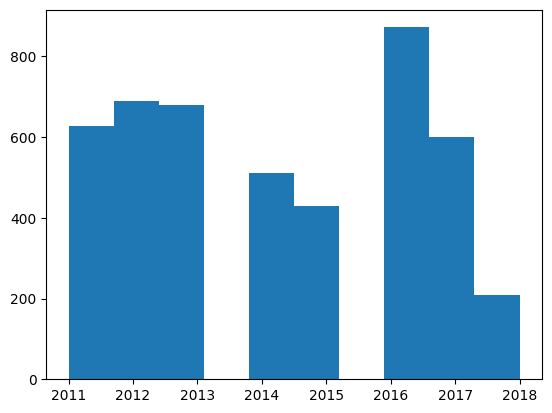

Cilindros


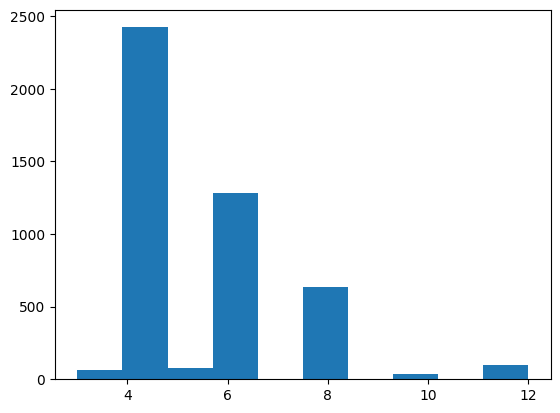

Potencia (HP)


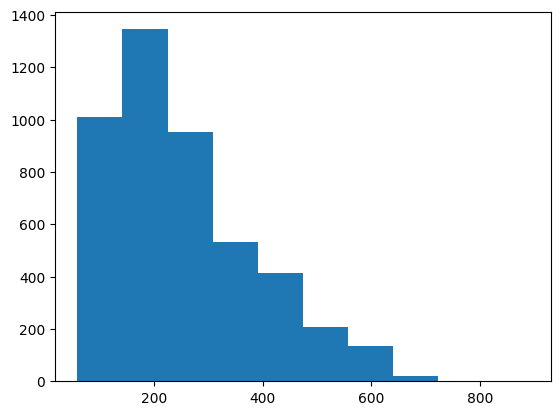

Tamaño (L)


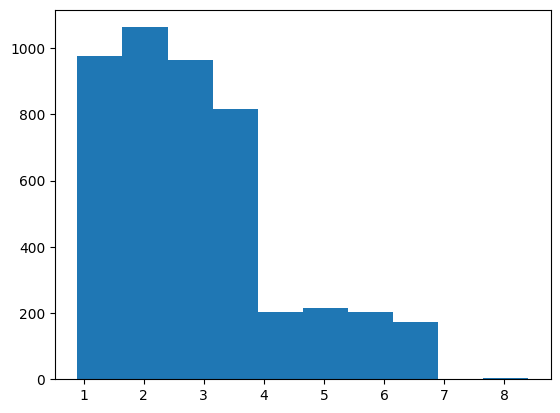

R. Ciudad (km/l)


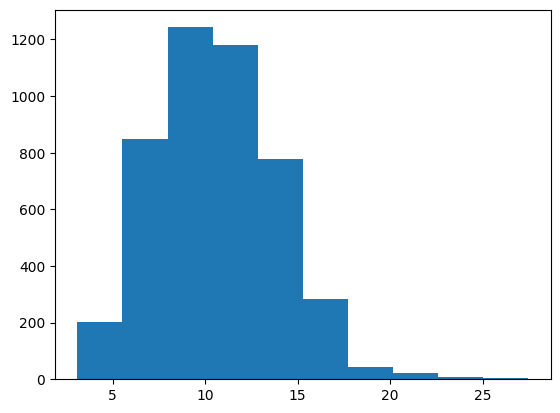

R. Carr. (km/l)


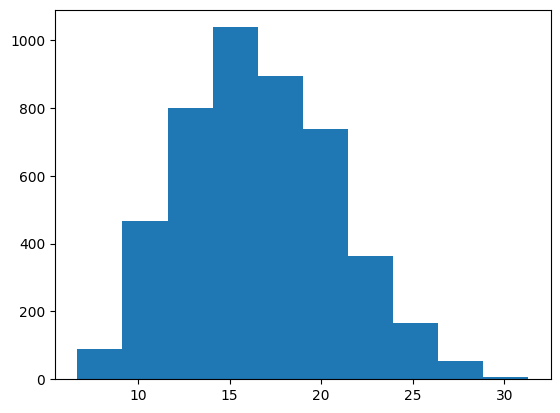

R. Comb. (km/l)


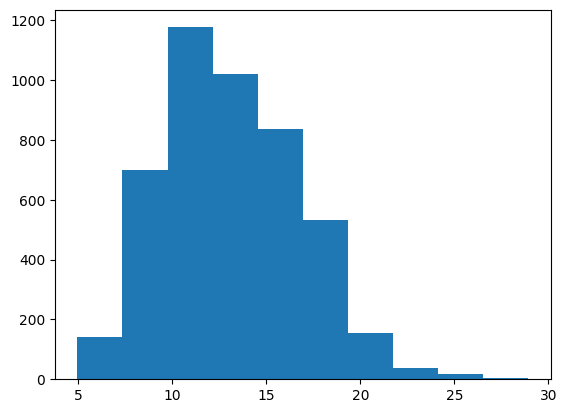

R. Ajust. (km/l)


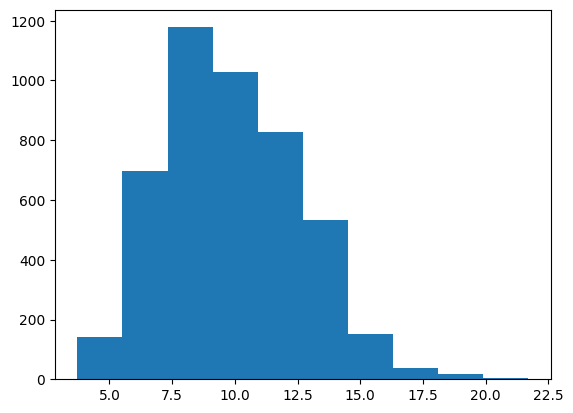

CO2(g/km)


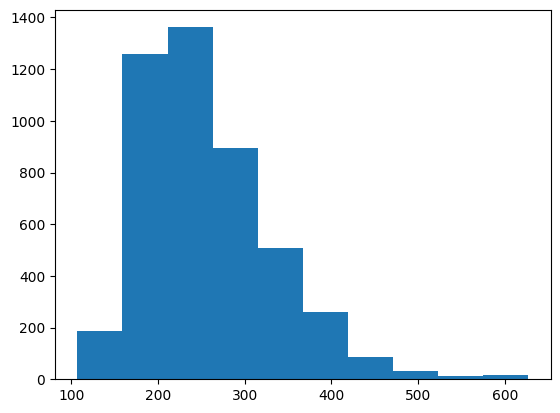

NOx (g/1000km)


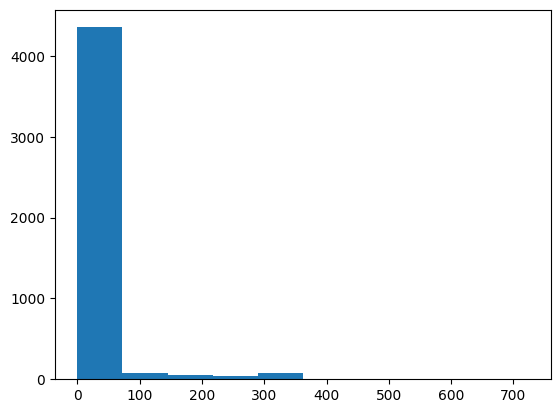

Calificación Gas Ef. Inv.


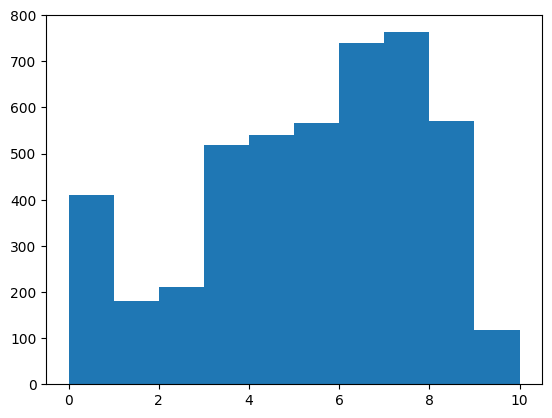

In [31]:
# Presenta tus resultados gráficamente

# Se grafican los histogramas de cada una de las variables para confirmar que no tienen la forma de una curva normal.

# histogram plot
from matplotlib import pyplot

for columna in df_num:
    # histogram plot
    pyplot.hist(df_num[columna])
    print(columna)
    pyplot.show()